# <span style = "color:rebeccapurple"> Classification

<span style="text-transform: uppercase;
        font-size: 14px;
        letter-spacing: 1px;
        font-family: 'Segoe UI', sans-serif;">
    Author
</span><br>
efrén cruz cortés
<hr style="border: none; height: 1px; background: linear-gradient(to right, transparent 0%, #ccc 10%, transparent 100%); margin-top: 10px;">

## <span style = "color:darkorange"> Conceptual Intermezzo - What is classification?

See slides

## <span style = "color:darkorchid"> Imports

In [15]:
# :: IMPORTS ::

# Scikit-learn specifics:
from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn import svm

# Helper modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Now that we are experienced with preprocessing and pipelines. Let's move on to a different machine learning task: classification.

## <span style = "color:darkorchid"> Alice: sommelière extraordinaire!

After coming back from her cold polar adventures, Alice is ready for a change of scenery, so she takes a trip to Italy. Being quite the sommelière herself, she visits her favorite ristorante in La Toscana, *Il Cappellaio Matto*, in search of good wine. As it turns out, there is a heated debate going on, everyone is wondering if sommelieres can actually distinguish different wines, or if they are just faking it.

Alice decides to settle the dispute with machine learning. Her colleagues trust her, so they give her a dataset containing the chemical composition of different wine samples. All these samples were grown in the Toscana region, but they were made of three different cultivars (a cultivar is a specific plant variety, in this case varieties of grape vines).

![alice-sommerlier](images/alice_sommelier.png){width=30%}

### <span style = "color:teal"> Load data

In [3]:
wine = datasets.load_wine(as_frame = True)

In [4]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

In [5]:
wine_X = wine["data"]
wine_y = wine["target"]

In [6]:
wine_X.shape

(178, 13)

In [7]:
wine_X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [8]:
wine_y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

Note the target is a pandas series. We could make it a dataframe:

In [9]:
wine_y = wine_y.to_frame(name = "cultivar")
wine_y.head()

,cultivar
0,0
1,0
2,0
3,0
4,0


<b>BUT</b>, scikit learn classifiers usually expect the target to be a 1-d array or a series, so we'll keep it as a series.

And just to make sure we don't mess things up, let's load it again in a unified cell:

In [10]:
# Load wine data
wine = datasets.load_wine(as_frame = True)
wine_X = wine["data"]
wine_y = wine["target"]

### <span style = "color:teal"> Using a support vector classifier

For now, we will skip the preprocessing stage and head straight to the classification task. `scikit-learn` provides different classifiers for us, let's start with the support vector machine (SVM). You can see the documentation [here](https://scikit-learn.org/stable/modules/svm.html). We can find support vector classifiers in the `svm` module, which we have already imported.

In [16]:
wX_train, wX_test, wy_train, wy_test = train_test_split(wine_X, wine_y, test_size = .15)

In [17]:
# Create SVM classifier:
wine_clf = svm.SVC()

In [18]:
# let's see our classifier
wine_clf

SVC()

In [19]:
# Fit the SVM classifier:
wine_clf.fit(wX_train, wy_train)

SVC()

In [20]:
wine_clf.classes_

array([0, 1, 2])

In [21]:
# Predict the cultivars
wine_predictions = wine_clf.predict(wX_test)
wine_predictions

array([1, 0, 1, 2, 1, 0, 1, 2, 0, 0, 2, 2, 1, 0, 0, 1, 1, 1, 1, 1, 2, 2,
       2, 0, 0, 2, 1])

Let's compare the predictions to the true values:

In [22]:
comparison_df = pd.DataFrame(data = {"Predicted": wine_predictions,
                                    "True Cultivars": wy_test})

In [17]:
comparison_df.head(20)

,Predicted,True Cultivars
70,0,1
153,1,2
41,0,0
15,0,0
31,0,0
142,1,2
123,1,1
45,0,0
159,1,2
40,2,0


Note: we didn't have a lot of data points, and since we have three classes (wine varieties), we are a bit tight on our data. That's why I chose a small test size. If you go back and change the test size parameter to something like $.3$, you will notice a big drop in performance.

Let's check now our accuracy (the proportion of times we got it right):

In [23]:
# Evaluate:
wine_clf.score(wX_test, wy_test)

0.7407407407407407

### <span style = "color:teal"> Adding Preprocessing

As stated before, the type of preprocessing we must do depends on your data and your model. All our features are numeric, which makes things easier. Let's go with the standard scaler for now.

In [24]:
# Create and fit preprocessor
wine_preprocessor = preprocessing.StandardScaler().fit(wX_train, wy_train)

In [25]:
# Transform data to standard scale
wX_train_trans = wine_preprocessor.transform(wX_train)

In [26]:
# Fit classifier to transformed data
wine_clf = svm.SVC().fit(wX_train_trans, wy_train)

In [27]:
# Evaluate on testing data:
    # Transform test data
wX_test_trans = wine_preprocessor.transform(wX_test)

    # Check accuracy
wine_clf.score(wX_test_trans, wy_test)

1.0

Woah!! Our accuracy skyrocketed, looks like preprocessing is very important uh?

### <span style = "color:teal"> Make a pipeline

In [34]:
# Step 1: Load the data
wine = datasets.load_wine(as_frame = True)
wine_X = wine["data"]
wine_y = wine["target"]

# Step 2: Split the data
seed = 42
wX_train, wX_test, wy_train, wy_test = train_test_split(wine_X, wine_y, test_size = .3, random_state=seed)

# Step 3: Create the pipeline
wine_pipeline = Pipeline(
    [
        ("preprocessor", preprocessing.StandardScaler()),
        ("classifier", svm.SVC())
    ]
)

# Step 4: Fit the pipeline
wine_pipeline.fit(wX_train, wy_train)

# Step 4.5: You can predict the class based on newly observed features:
print(wine_pipeline.predict(wX_train[0:3]))     # <-- Predict class for first 3 test datapoints

# Step 5: You can evaluate the accuracy of the classifier on the whole test dataset
wine_pipeline.score(wX_test, wy_test)

[2 1 1]


0.9814814814814815

In [35]:
wine_pipeline

Pipeline(steps=[('preprocessor', StandardScaler()), ('classifier', SVC())])

### <span style = "color:teal"> Visualization

To build some intuition on classification, we'll need to make a 2D plot. Below I'm plotting two features of the iris dataset, together with the classification regions. The colored regions is what the SVM decides to classify as one class or another. Each point is colored by its true label.

(The code for generating this image is found in `support_materials.ipynb`)

![classification-visualization](images/classification_viz.png){width=50%}

## <span style = "color:red"> Long Exercise - Bo's daunting dilemma

Having followed Alice to Italy, Bo travels south to visit the famous city of Pompei. In there, they find the walls are full of ancient romans' graffiti! Bo would like to have a dataset of all the text in the walls, but copying it one by one would be incredibly daunting. They instead decide to take pictures and figure it out later.

Back in their lab, Bo needs to create a classifier that takes as inputs images of hand-written text, and maps them to their proper symbol. To begin, Bo will focus on numerical digits.

Load the "digits" dataset from `scikit-learn` and build a classifier to achieve this task.

![pompeii-graffiti](images/pompeii_02.png){width=40%}

Good luck!

**Notes**

- Each data point is an 8x8 pixels image
- An image is basically a matrix of numbers, where numbers at each position represent color values (grey scale)
- You can "flatten" this matrix into a long vector, which will be your feature vector
- The labels are the actual characters for the different numbers (0, 1, 2, etc.)
- Your dataset will contain 'images', which is a 3D array representing all images (N, 8, 8)
- Your dataset will contain 'data', which is the flattened array (N, 64)

In [36]:
# Load digits dataset
digits = datasets.load_digits()

In [ ]:
# Print the description of the dataset

In [ ]:
# print the keys of the dataset

In [ ]:
# Let me show you an image, in numeric matrix form
digits.images[0]

In [ ]:
# This is the flattened version, use it for classification
digits.data[0]

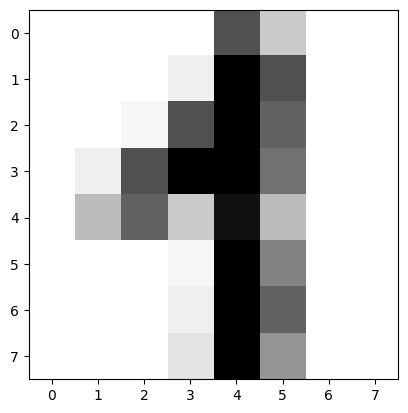

In [40]:
# This is how the image actually looks, can you guess the digit?
plt.imshow(digits.images[42], cmap='Greys')
plt.show()

In [ ]:
# Now build your own classification pipeline!


# <span style = "color:rebeccapurple"> Hyperparameters

Many machine learning algorithms depend on a few hyperparameters, which can be very influential for performance. Let's talk a bit about the hyperparameters for the support vector classifier.

**Regularization.** Regularization is the process of penalizing complicated decision boundaries. For the `SVC` class, this is done through the parameter `C`.

**Local Influence.** The extent to which individual points influence the classifier can be controlled with the parameter `gamma`. If gamma is too large, training data points will not interact much when making up the classifier, effectively creating pockets of one class. If on the other hand, gamma is too small, the influence of points spread throughout space, effectively creating a large region for one class.

Let's see how they affect performance to build an intuition. The default value of `C` is $1$. The default value of `gamma` is a heuristic based on the data's variance.

In [41]:
# let's make a function that takes in a value of C, and an sklearn dataset, and outputs the classification accuracy
def full_classification(data, C_param, gamma_param = None):
    if gamma_param:
        params = {'C': C_param, 'gamma':gamma_param}
    else:
        params = {'C': C_param}
    seed = 42
    X = data.data
    y = data.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state=seed)
    classif_pipeline = Pipeline([
        ("preprocessor", preprocessing.StandardScaler()),
        ("classifier", svm.SVC(**params))
    ])
    classif_pipeline.fit(X_train, y_train)
    accuracy = classif_pipeline.score(X_test, y_test)
    return accuracy

In [42]:
# Load the data
wine = datasets.load_wine(as_frame = True)

# Get accuracy for different levels of C
C_vals = [0.01, .001, .5, 1, 10, 100, 1000]
accs = []
for c in C_vals:
    accs.append(full_classification(wine, c))
print(accs)

[0.4, 0.4, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777]


Let's test `gamma` now:

In [43]:
# Load the data
wine = datasets.load_wine(as_frame = True)

# Get accuracy for different levels of C
gamma_vals = [.001, .01, .1, .5, 1, 10, 100]
accs = []
for g in gamma_vals:
    accs.append(full_classification(wine, C_param=1, gamma_param=g))
print(accs)

[0.8444444444444444, 1.0, 0.9777777777777777, 0.8888888888888888, 0.6444444444444445, 0.4, 0.4]


We'll get back to hyperparameters in the next two sections, when we look at evaluation and cross-validation.

## <span style="color:darkorchid">Other Classifiers</span>

Finally, while we do not have time to go over other classification algorithms, `sklearn` offers a variety, including nearest neighbors and random forests. For more details refer to the [documentation](https://scikit-learn.org/stable/supervised_learning.html).